## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Missing Value Analysis](#4)
1. [Categorical Feature Analysis](#5)
1. [Detect Outliers](#6)
1. [Numerical Feature Analysis](#7)
1. [Feature Selection](#8)
1. [Dealing with Imbalancing](#9)
1. [Standardization](#10)
1. [Principle Component Analysis](#11)
1. [Train Test Split](#12)
1. [Modelling](#13)
1. [Conclusion](#14)

## Introduction
* In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

<a id="1"></a>
## Python Libraries
* In this section, we import used libraries during this kernel.

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn  import svm
from sklearn.ensemble import RandomForestClassifier,VotingClassifier;
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from collections import Counter
from sklearn.decomposition import PCA
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


import warnings
warnings.filterwarnings("ignore")

/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv


## Data Content
 The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

* **obj_ID** = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
* **alpha** = Right Ascension angle (at J2000 epoch)
* **delta** = Declination angle (at J2000 epoch)
* **u** = Ultraviolet filter in the photometric system
* **g** = Green filter in the photometric system
* **r** = Red filter in the photometric system
* **i** = Near Infrared filter in the photometric system
* **z** = Infrared filter in the photometric system
* **run_ID** = Run Number used to identify the specific scan
* **rereun_ID** = Rerun Number to specify how the image was processed
* **cam_col** = Camera column to identify the scanline within the run
* **field_ID** = Field number to identify each field
* **spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
* **class** = object class (galaxy, star or quasar object)
* **redshift** = redshift value based on the increase in wavelength
* **plate** = plate ID, identifies each plate in SDSS
* **MJD** = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
* **fiber_ID** = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

<a id="3"></a>
## Read and Analyse Data
* In this section, we read star_classification.csv

In [2]:
# read data 
df = pd.read_csv("../input/stellar-classification-dataset-sdss17/star_classification.csv")

In [3]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [4]:
df.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

<a id="4"></a>
## Missing Value Analysis

In [6]:
# missing value
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

<a id="5"></a>
## Categorical Feature Analysis

In [7]:
categorical_list = ["class"]

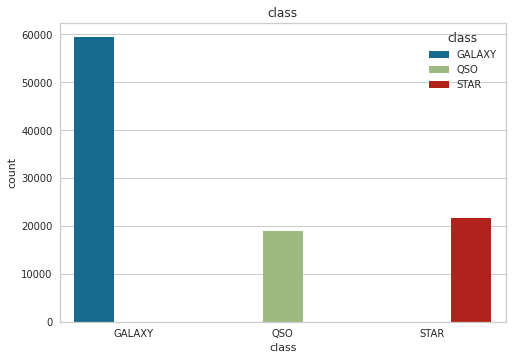

In [8]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "class")
    plt.title(i)

 It can be seen that data class are imbalance.We need to implement some balancing techniques

In [9]:
df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

 We should discritize class output so that our model can understand the output

In [10]:
df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]

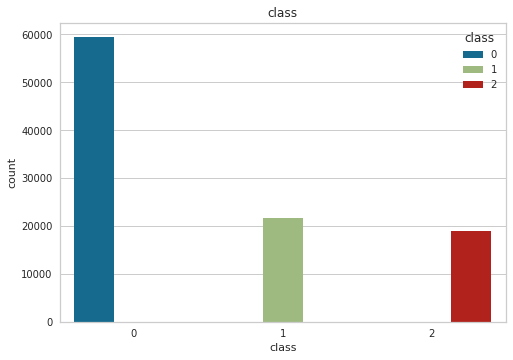

In [11]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "class")
    plt.title(i)

<a id="6"></a>
##  Detect Outliers

In [12]:
numeric_list = ["obj_ID", "alpha","delta","u","g","r","i","z","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","redshift","plate","MJD","fiber_ID"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

   redshift  plate    MJD  fiber_ID  
0  0.634794   5812  56354       171  
1  0.779136  10445  58158       427  
2  0.644195   4576  55592       299  
3  0.932346   9149  58039       775  
4  0.116123   6121  56187       842

In [13]:
# outlier detection
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df) 


In [14]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold = np.quantile(x_score , .10)                                            
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

In [15]:
threshold

-2.3169030647147557

In [16]:
len(outlier_index)

10000

In [17]:
df.drop(outlier_index, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       90000 non-null  float64
 1   alpha        90000 non-null  float64
 2   delta        90000 non-null  float64
 3   u            90000 non-null  float64
 4   g            90000 non-null  float64
 5   r            90000 non-null  float64
 6   i            90000 non-null  float64
 7   z            90000 non-null  float64
 8   run_ID       90000 non-null  int64  
 9   rerun_ID     90000 non-null  int64  
 10  cam_col      90000 non-null  int64  
 11  field_ID     90000 non-null  int64  
 12  spec_obj_ID  90000 non-null  float64
 13  class        90000 non-null  int64  
 14  redshift     90000 non-null  float64
 15  plate        90000 non-null  int64  
 16  MJD          90000 non-null  int64  
 17  fiber_ID     90000 non-null  int64  
dtypes: float64(10), int64(8)
memory usage: 13.0 MB

<a id="7"></a>
## Numerical Feature Analysis

In [19]:
numerical_list = ["obj_ID","alpha","delta","u","g","r","i","z","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","class","redshift","plate","MJD","fiber_ID"]

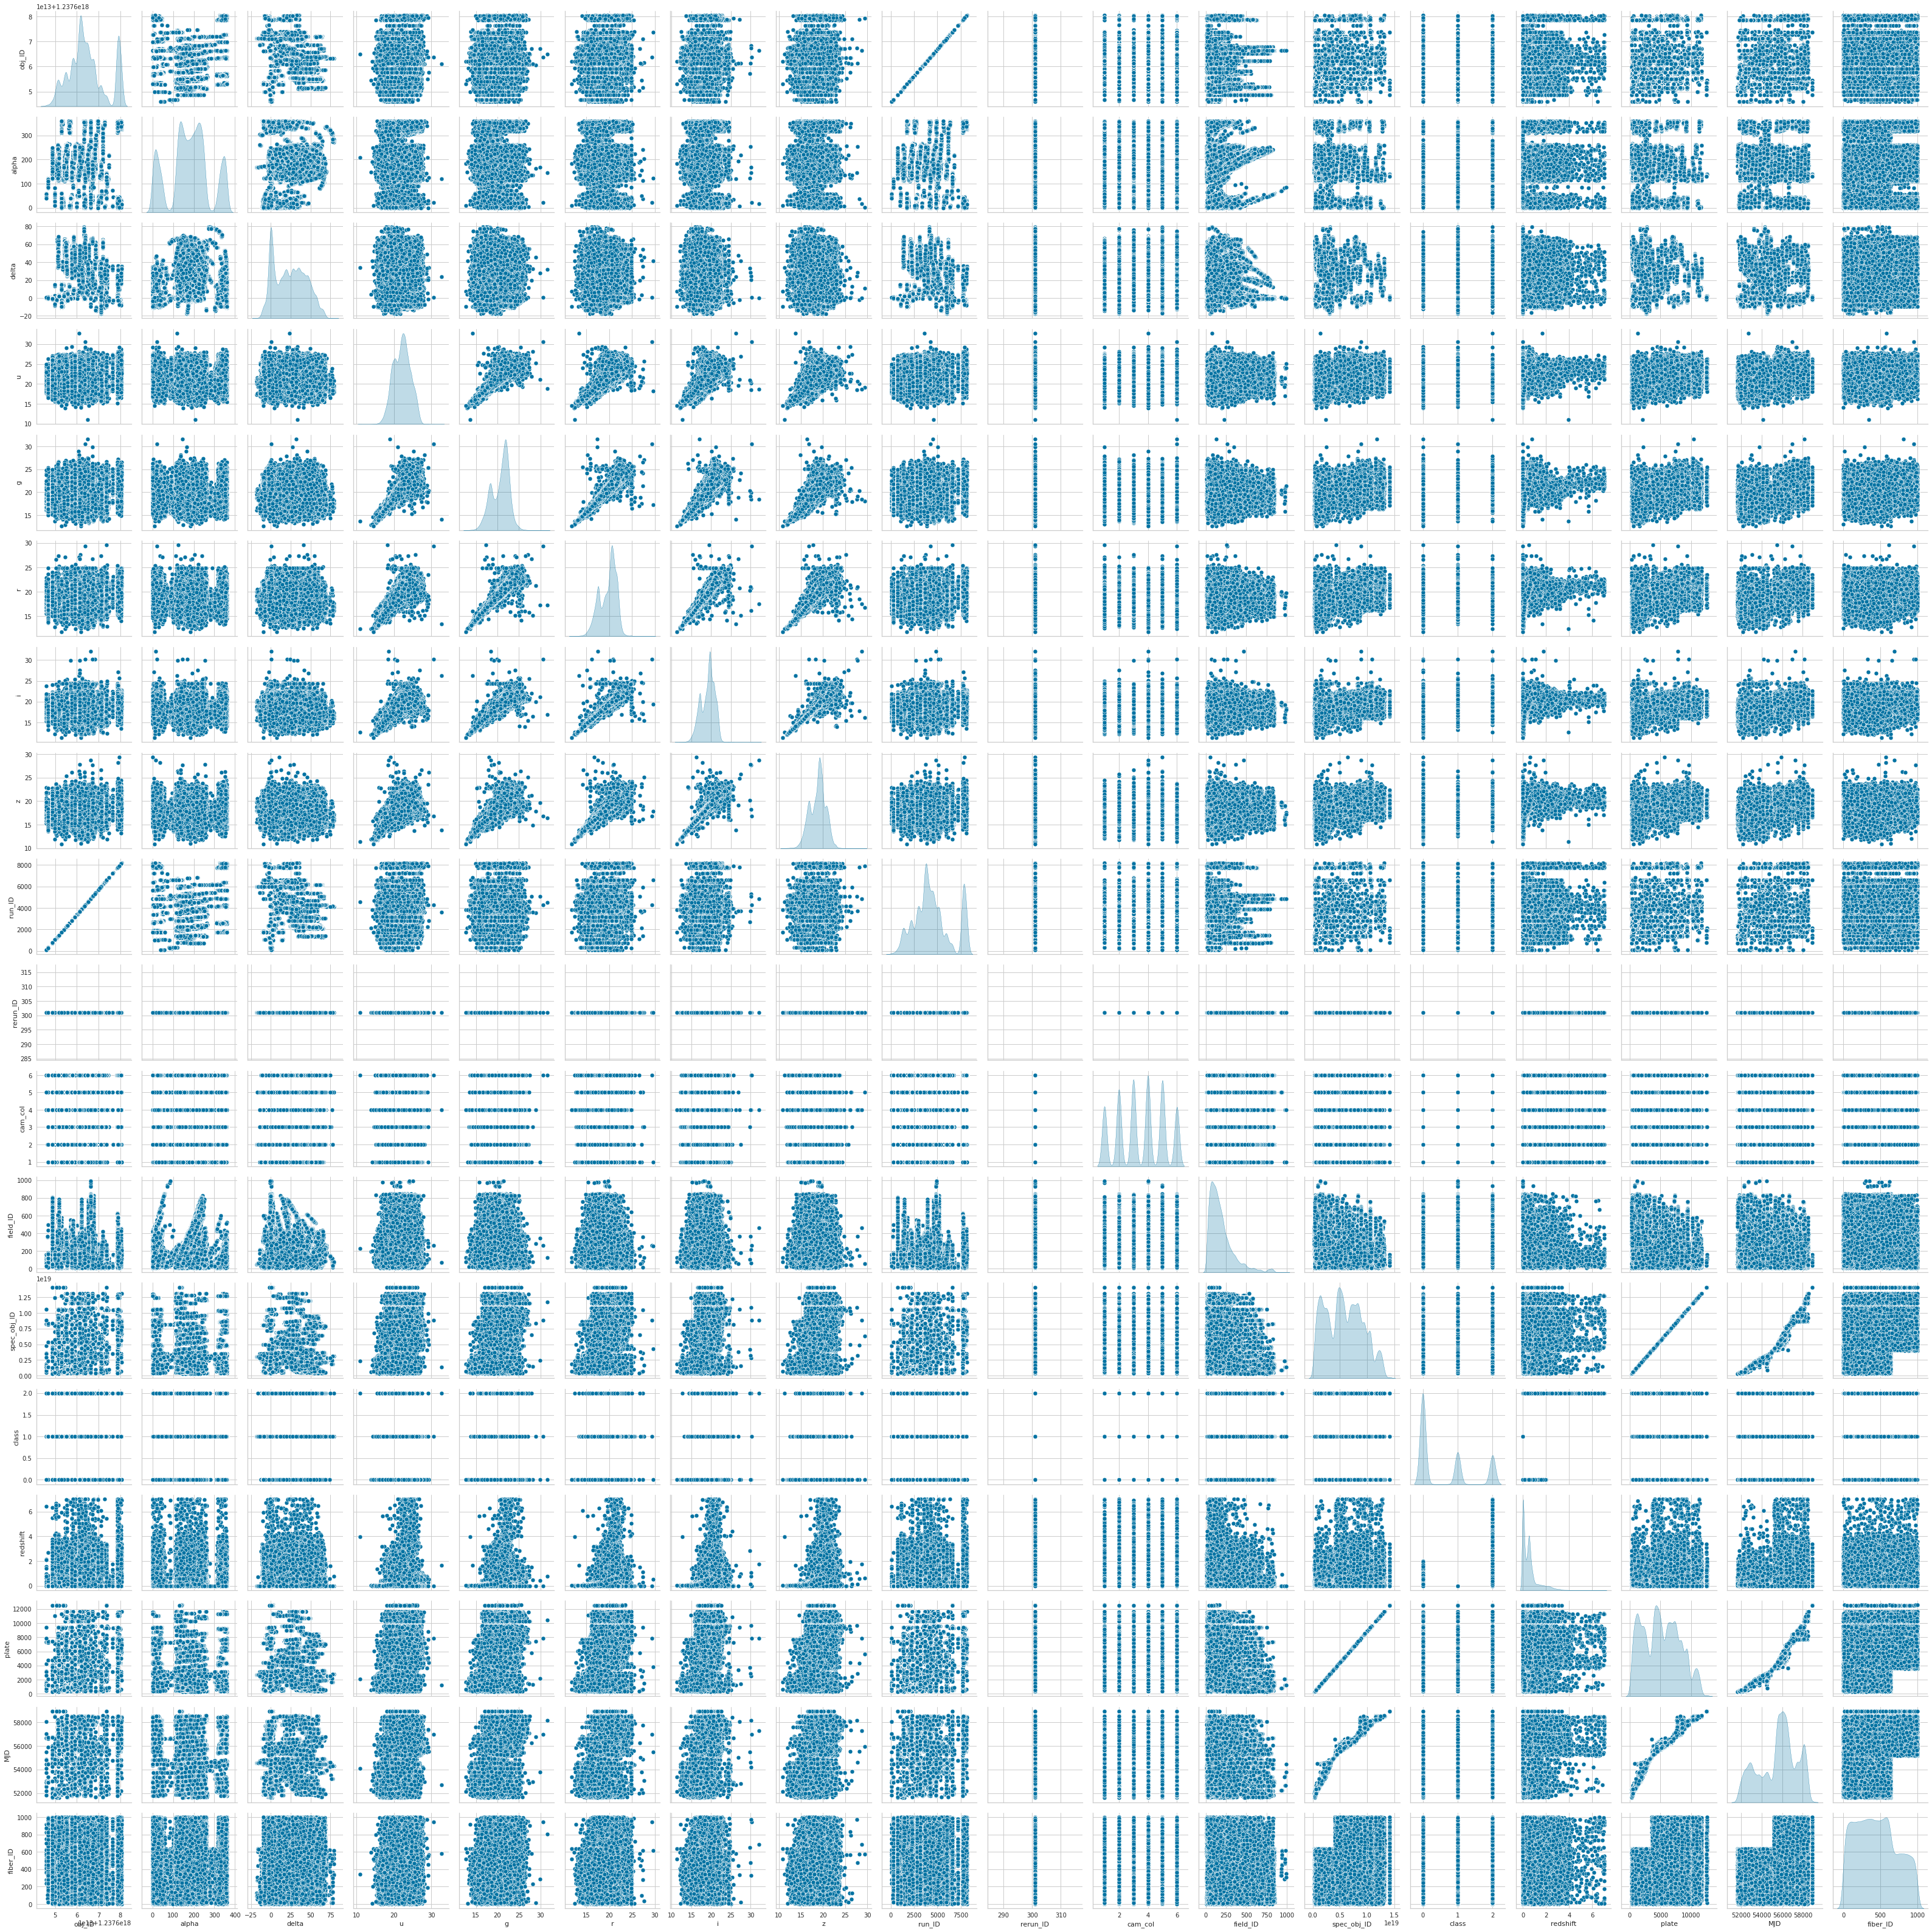

In [20]:
df_numeric = df.loc[:, numerical_list]
sns.pairplot(df_numeric, diag_kind = "kde")
plt.show()

<a id="8"></a>
##  Feature Selection

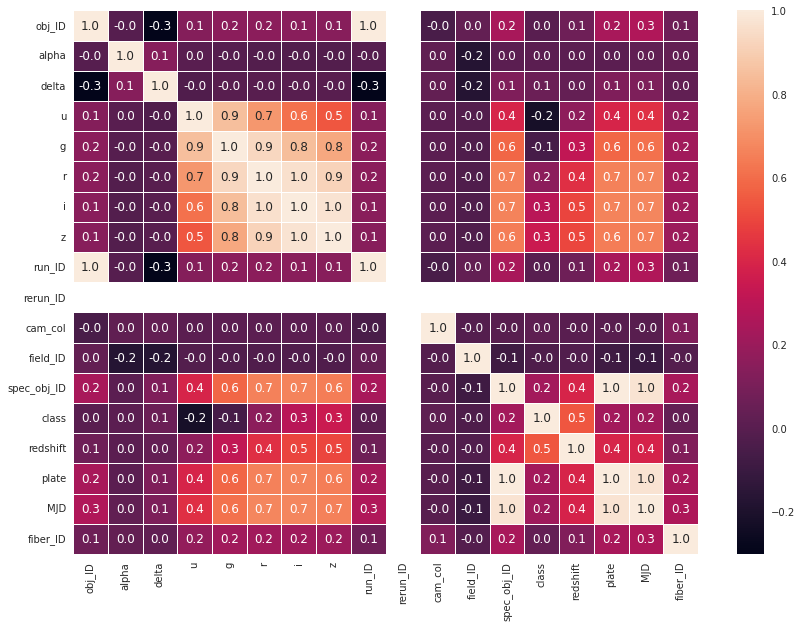

In [21]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [22]:
corr = df.corr()

In [23]:
corr["class"].sort_values()

u             -0.225727
g             -0.061792
field_ID      -0.037150
run_ID         0.000467
obj_ID         0.000469
alpha          0.006893
cam_col        0.016330
fiber_ID       0.035822
delta          0.058363
r              0.157763
MJD            0.212287
spec_obj_ID    0.222534
plate          0.222534
i              0.291805
z              0.347906
redshift       0.541167
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

Hence we can drop NAN value and values between -0.067 and 0.056

In [24]:
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

In [25]:
df.head()

u         g         r         i         z   spec_obj_ID  class  \
0  23.87882  22.27530  20.39501  19.16573  18.79371  6.543777e+18      0   
1  24.77759  22.83188  22.58444  21.16812  21.61427  1.176014e+19      0   
2  25.26307  22.66389  20.60976  19.34857  18.94827  5.152200e+18      0   
3  22.13682  23.77656  21.61162  20.50454  19.25010  1.030107e+19      0   
4  19.43718  17.58028  16.49747  15.97711  15.54461  6.891865e+18      0   

   redshift  plate    MJD  
0  0.634794   5812  56354  
1  0.779136  10445  58158  
2  0.644195   4576  55592  
3  0.932346   9149  58039  
4  0.116123   6121  56187

<a id="9"></a>
## Dealing with Imbalancing

We should deal with imbalance data. We select the SMOTE technique.

* Synthetic Minority Oversampling Technique, or SMOTE for short.By simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

* SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

* Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.


In [26]:
x = df.drop(["class"], axis = 1)
y = df.loc[:,"class"].values

In [27]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 53813, 1: 18996, 2: 17191})
Resampled dataset shape Counter({0: 53813, 2: 53813, 1: 53813})


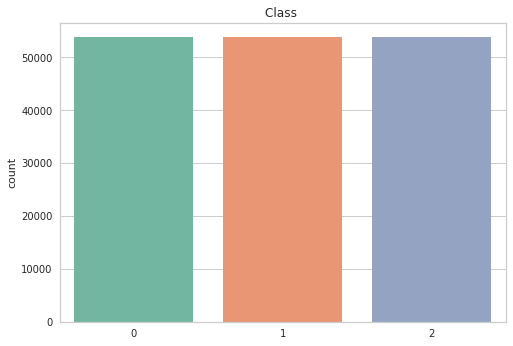

In [28]:
sns.countplot(y, palette='Set2')
plt.title("Class ",fontsize=12)
plt.show()

<a id="10"></a>
## Standardization
* Standardize features by removing the mean and scaling to unit variance.

In [29]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

<a id="11"></a>
## Principle Component Analysis
* PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible.

In [30]:
y=pd.DataFrame(y,columns=["class"])

In [31]:
pca = PCA(0.95)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [32]:
finalDf = pd.concat([principalDf, y[['class']]], axis = 1)

In [33]:
finalDf

principal component 1  principal component 2  principal component 3  \
0                   -0.873734              -0.612653              -0.743082   
1                   -4.014351               0.115437              -0.920086   
2                   -0.826809              -1.584404              -0.731895   
3                   -2.721206               0.534099              -0.655859   
4                    2.898377               2.376681              -0.927715   
...                       ...                    ...                    ...   
161434              -0.666866               0.895659               0.818889   
161435              -0.731130               0.888996               1.807303   
161436              -3.756109              -0.193403              -0.354779   
161437              -0.796965               1.219121               1.599704   
161438              -1.984668               2.612600               0.079072   

        principal component 4  class  
0                   -0.712831      0  
1                    0.071618      0  
2                   -0.940879      0  
3                   -0.208105      0  
4                   -0.788454      0  
...                       ...    ...  
161434               0.131547      2  
161435              -0.951884      2  
161436               0.245570      2  
161437              -0.596319      2  
161438              -0.032072      2  

[161439 rows x 5 columns]

In [34]:
pca.explained_variance_ratio_

array([0.67568036, 0.15966989, 0.101009  , 0.04563026])

* The explained variance tells you how much information (variance) can be attributed to each of the principal components.By using the attribute explained_variance_ratio_, it can be seen that the first principal component contains 67.56% of the variance,the second principal component contains 15.96% of the variance,third principal component contains 10.10% of the variance and fourth principal component contains 4.56% of the variance . Together, the four components contain 98.18% of the information.

<a id="12"></a>
## Train Test Split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(principalDf, y, test_size = 0.33, random_state = 42)

In [36]:
print("x_train: {}".format(x_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

x_train: (108164, 4)
x_test: (53275, 4)
y_train: (108164, 1)
y_test: (53275, 1)


<a id="13"></a>
## Modelling

### Compare 4 ML model and evaluate mean accuracy.
* SVM
* Random Forest
* KNN
* Logistic Regression


### Support Vector Machine (SVM)

In [37]:
svm_clf = svm.SVC(kernel='rbf', C=10, random_state=42)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.972


In [38]:
classes = ['GALAXY','STAR','QSO']

### Confusion Matrix for SVM


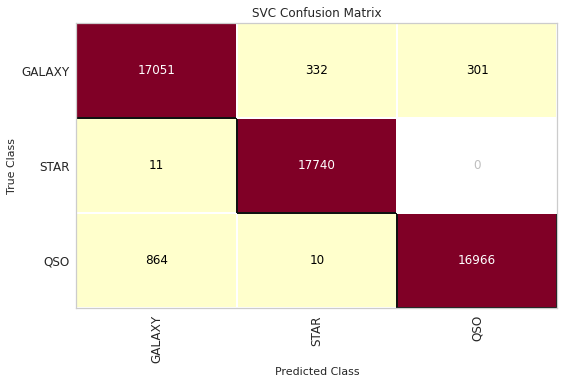

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [39]:
svm_cm = ConfusionMatrix(svm_clf, classes=classes, cmap='YlOrRd')
svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

In [40]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     17684
           1       0.98      1.00      0.99     17751
           2       0.98      0.95      0.97     17840

    accuracy                           0.97     53275
   macro avg       0.97      0.97      0.97     53275
weighted avg       0.97      0.97      0.97     53275



### ROC Curve for SVC

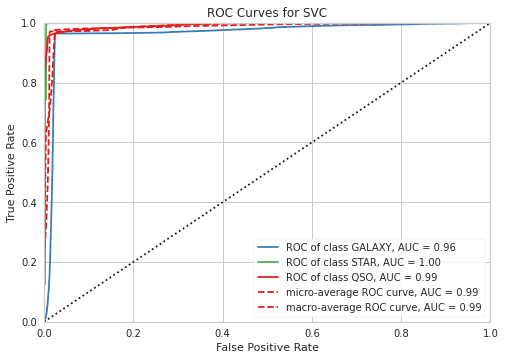

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:
visualizer = ROCAUC(svm_clf, classes=classes)
set_palette('bold')
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)       
visualizer.show()                      

### Random Forest Classifier

In [42]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)
y_predicted = RFC.predict(x_test)
score = RFC.score(x_test, y_test)
rf_score_ = np.mean(score)
print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.960


### Confusion Matrix for RFC

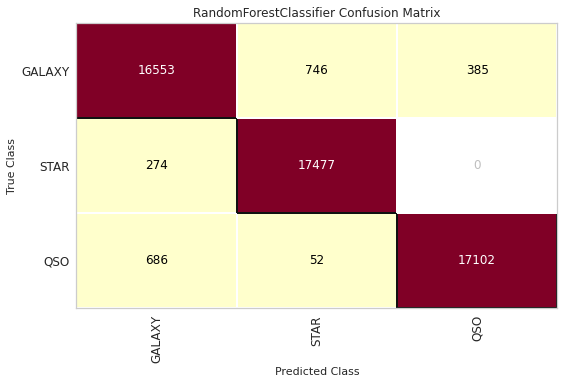

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [43]:
RFC_cm = ConfusionMatrix(RFC, classes=classes, cmap='YlOrRd')
RFC_cm.fit(x_train, y_train)
RFC_cm.score(x_test, y_test)
RFC_cm.show()

In [44]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     17684
           1       0.96      0.98      0.97     17751
           2       0.98      0.96      0.97     17840

    accuracy                           0.96     53275
   macro avg       0.96      0.96      0.96     53275
weighted avg       0.96      0.96      0.96     53275



### ROC Curve for RFC

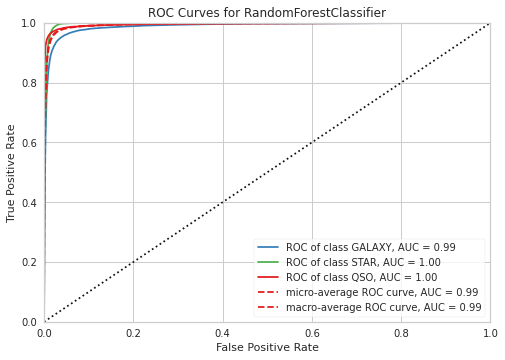

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [45]:
visualizer = ROCAUC(RFC, classes=classes)
set_palette('bold')
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)       
visualizer.show()   

### KNN (K-Nearest Neighbors)

In [46]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)
y_predicted_KNN = KNN.predict(x_test)
score = KNN.score(x_test, y_test)
KNN_score_ = np.mean(score)
print('Accuracy : %.3f' % (KNN_score_))

Accuracy : 0.954


### Confusion Matrix for KNN

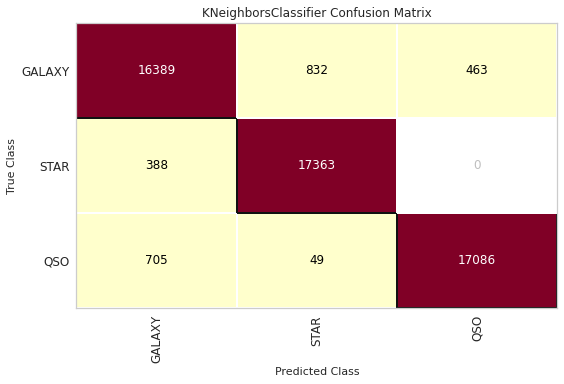

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [47]:
KNN_cm = ConfusionMatrix(KNN, classes=classes, cmap='YlOrRd')
KNN_cm.fit(x_train, y_train)
KNN_cm.score(x_test, y_test)
KNN_cm.show()

In [48]:
print(classification_report(y_test, y_predicted_KNN))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     17684
           1       0.95      0.98      0.96     17751
           2       0.97      0.96      0.97     17840

    accuracy                           0.95     53275
   macro avg       0.95      0.95      0.95     53275
weighted avg       0.95      0.95      0.95     53275



### ROC Curve for KNN

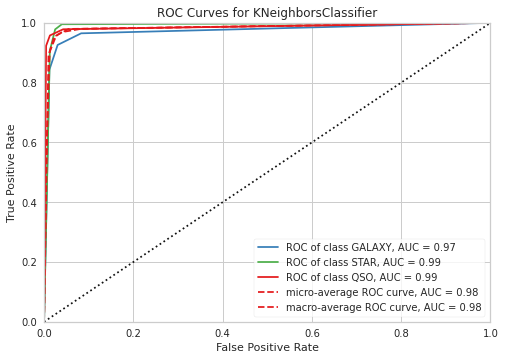

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [49]:
visualizer = ROCAUC(KNN, classes=classes)
set_palette('bold')
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)       
visualizer.show()   

### Logistic Regression

In [50]:
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LR.fit(x_train,y_train)
y_predicted_LR = LR.predict(x_test)
score = LR.score(x_test, y_test)
LR_score_ = np.mean(score)
print('Accuracy : %.3f' % (LR_score_))

Accuracy : 0.957


### Confusion Matrix for LR

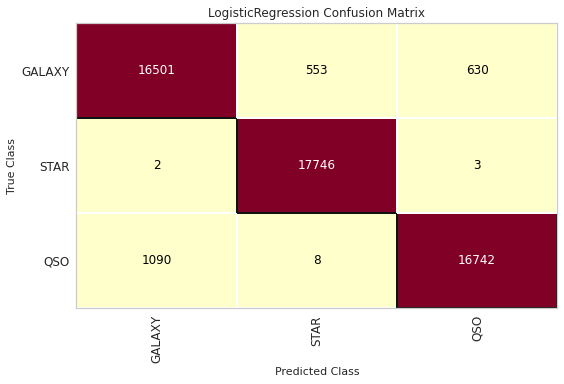

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [51]:
LR_cm = ConfusionMatrix(LR, classes=classes, cmap='YlOrRd')
LR_cm.fit(x_train, y_train)
LR_cm.score(x_test, y_test)
LR_cm.show()

In [52]:
print(classification_report(y_test, y_predicted_LR))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     17684
           1       0.97      1.00      0.98     17751
           2       0.96      0.94      0.95     17840

    accuracy                           0.96     53275
   macro avg       0.96      0.96      0.96     53275
weighted avg       0.96      0.96      0.96     53275



### ROC Curve for LR

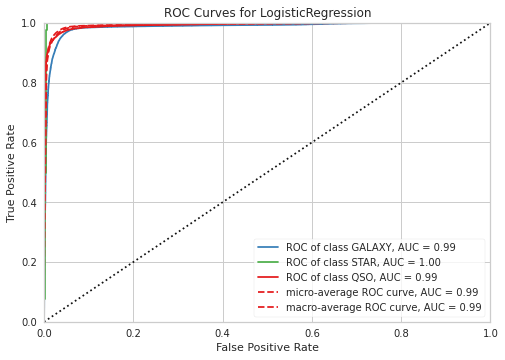

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [53]:
visualizer = ROCAUC(LR, classes=classes)
set_palette('bold')
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)       
visualizer.show()   

### Ensemble Modelling

In [54]:
kfold = model_selection.KFold(n_splits=5, shuffle = True)
# create the sub models
estimators = []
model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('RFC', model2))
model3 = KNeighborsClassifier()
estimators.append(('knn', model3))
# create the ensemble model

ensemble = VotingClassifier(estimators,voting ='hard')
results = model_selection.cross_val_score(ensemble, x_train, y_train, cv=kfold,n_jobs=-1)
warnings.filterwarnings("ignore")


In [55]:
ENSM_score_ = np.mean(results)
print('Accuracy : %.3f' % (ENSM_score_))

Accuracy : 0.962


### Confusion Matrix for Ensemble Model

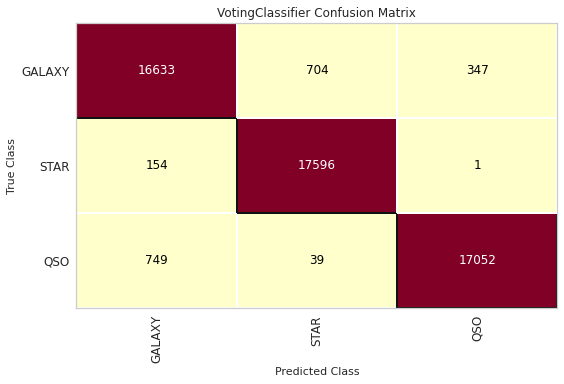

In [56]:
ENSM_cm = ConfusionMatrix(ensemble, classes=classes, cmap='YlOrRd')
ENSM_cm.fit(x_train, y_train)
ENSM_cm.score(x_test, y_test)
ENSM_cm.show()
warnings.filterwarnings("ignore")

In [57]:
y_predicted_ensemble = ensemble.predict(x_test)
score = ensemble.score(x_test, y_test)
ensemble_score_ = np.mean(score)

In [58]:
print(classification_report(y_test, y_predicted_ensemble))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     17684
           1       0.96      0.99      0.98     17751
           2       0.98      0.96      0.97     17840

    accuracy                           0.96     53275
   macro avg       0.96      0.96      0.96     53275
weighted avg       0.96      0.96      0.96     53275



<a id="14"></a>
## Conclusion

We investigated 4 ML model and 1 ensemble mode about Stellar classification problem, we used the most common metrics :

* Accuracy
* Precision (P)
* Recall (R)
* F1 score (F1)
* Area under the ROC (Receiver Operating Characteristic) curve or simply AUC (AUC):

Since Stellar data are highly unbalanced, we have used SMOTE resampling technique. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. In other words, smote creates synthetic minority data without modify the data set in order to make data balanced.

Also, we did feature selection simply by looking the correlation coefficients and we remove 9 of them whose correlation coefficients are between -0.067 and 0.056.

After feature selection still we have 9 features and approximately 150.000 data after resampling. Thus, dimension reduction is a must. We choose 4 principal components which represents approximately %98 of the data. At the end number of features have decreased to 4 out of 18.

Most of the metrics that we discussed until now give very good accuracy. However, accuracy is not the only metric that we should search for. Since the data has not symmetry, we should also check recall values. As one can see from the results almost all models has very good accuracy and recall values. However, SVM is one step ahead of the other models.

Lastly, we try to train ensemble model which contains Random Forest , KNN and Logistic Regression.We used VotingClassifier with 5 fold cross validation. Mean accuracy and recall values are similar to other three models. Hence we can say that ensembling models have not major advantages when compared to other 3 models.

